# landscraper - doing the dirty work for intellectual property (IP) decisions

## Library Imports:

In [1]:
from sklearn.datasets import *
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
from sklearn import metrics

import pickle

from glob import glob
import numpy as np

import os

## Load Models: 

In [2]:
with open("/home/ajindal/Documents/Projects/landscraper/pickles/model_1", "rb") as f:
    model = pickle.load(f)
    
with open("/home/ajindal/Documents/Projects/landscraper/pickles/model_2", "rb") as f:
    model_sw = pickle.load(f)
    
with open("/home/ajindal/Documents/Projects/landscraper/pickles/model_3", "rb") as f:
    model_bestprm = pickle.load(f)

## Load New Data Set:

In [3]:
test_set = "/home/ajindal/Documents/Projects/landscraper/test-set"
patents = load_files(test_set)
classifications = patents.target_names

X_new = patents.data
y_new = patents.target

## Visualize New Data Set:

In [4]:
for classif in glob(os.path.join(test_set, "*")):
    files = os.listdir(classif)
    num_files = len(files)
    print ("Class {} has {} patents for predicting".format(os.path.basename(classif), num_files))

Class G06N has 182 patents for predicting
Class G06D has 0 patents for predicting
Class G06G has 100 patents for predicting
Class G06F has 1717 patents for predicting
Class G06T has 895 patents for predicting
Class G06M has 14 patents for predicting
Class G06J has 88 patents for predicting
Class G06E has 61 patents for predicting
Class G06Q has 963 patents for predicting
Class G06K has 880 patents for predicting
Class G06C has 367 patents for predicting


## Make predictions with each of the three models
__Model 1:__ "model"

__Model 2:__ "model_sw"

__Model 3:__ "model_bestprm"

In [5]:
prediction = model.predict(X_new)
np.mean(prediction == y_new)

0.6273020694892728

In [6]:
prediction_sw = model_sw.predict(X_new)
np.mean(prediction_sw == y_new)

0.6354661097398899

In [7]:
prediction_prm = model_bestprm.predict(X_new)
np.mean(prediction_prm == y_new)

0.6007214733244731

### Model 1:

/usr/local/lib/python2.7/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


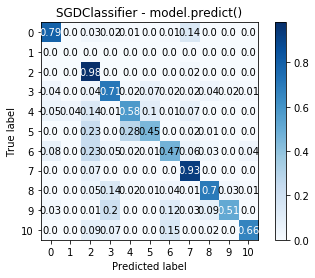

In [11]:
skplt.metrics.plot_confusion_matrix(y_new, prediction, normalize=True)
plt.title("SGDClassifier - model.predict()")
plt.show()

In [12]:
print(metrics.classification_report(y_new, prediction, target_names=classifications))

             precision    recall  f1-score   support

       G06C       0.61      0.79      0.69       367
       G06D       0.00      0.00      0.00         0
       G06E       0.13      0.98      0.22        61
       G06F       0.79      0.71      0.75      1717
       G06G       0.37      0.58      0.45       100
       G06J       0.21      0.45      0.29        88
       G06K       0.58      0.47      0.52       880
       G06M       0.06      0.93      0.12        14
       G06N       0.38      0.70      0.49       182
       G06Q       0.93      0.51      0.66       963
       G06T       0.92      0.66      0.77       895

avg / total       0.75      0.63      0.66      5267



/usr/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Model 2:

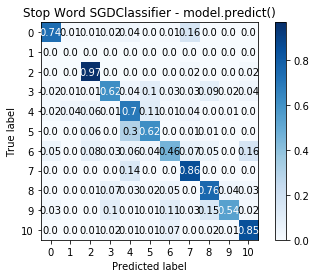

In [14]:
skplt.metrics.plot_confusion_matrix(y_new, prediction_sw, normalize=True)
plt.title("Stop Word SGDClassifier - model.predict()")
plt.show()

In [15]:
print(metrics.classification_report(y_new, prediction_sw, target_names=classifications))

             precision    recall  f1-score   support

       G06C       0.72      0.74      0.73       367
       G06D       0.00      0.00      0.00         0
       G06E       0.34      0.97      0.50        61
       G06F       0.86      0.62      0.72      1717
       G06G       0.26      0.70      0.38       100
       G06J       0.19      0.62      0.29        88
       G06K       0.63      0.46      0.53       880
       G06M       0.06      0.86      0.10        14
       G06N       0.28      0.76      0.41       182
       G06Q       0.90      0.54      0.67       963
       G06T       0.77      0.85      0.81       895

avg / total       0.75      0.64      0.67      5267



### Model 3:

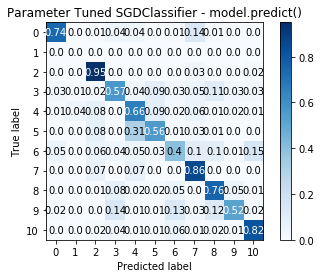

In [18]:
skplt.metrics.plot_confusion_matrix(y_new, prediction_prm, normalize=True)
plt.title("Parameter Tuned SGDClassifier - model.predict()")
plt.show()

In [17]:
print(metrics.classification_report(y_new, prediction_prm, target_names=classifications))

             precision    recall  f1-score   support

       G06C       0.71      0.74      0.73       367
       G06D       0.00      0.00      0.00         0
       G06E       0.32      0.95      0.48        61
       G06F       0.80      0.57      0.67      1717
       G06G       0.27      0.66      0.38       100
       G06J       0.20      0.56      0.29        88
       G06K       0.59      0.40      0.48       880
       G06M       0.04      0.86      0.08        14
       G06N       0.25      0.76      0.38       182
       G06Q       0.86      0.52      0.65       963
       G06T       0.78      0.82      0.80       895

avg / total       0.72      0.60      0.63      5267

